In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('深圳地铁轨道数据7.11-7.19.xlsx')
df = df[~df['测点编号'].isin(['kz1', 'kz2', 'kz3', 'kz4'])]
df['temp'] = df['测点编号'].str.replace('jc','')

In [3]:
df['测点编号2'], df['测点编号2_index'] = df['temp'].str.split('-').str[0], df['temp'].str.split('-').str[1]

In [4]:
df['测点编号2']  = df['测点编号2'].astype('int')
df['测点编号2_index']  = df['测点编号2_index'].astype('int')

In [5]:
df = (df.sort_values(by = ['测点编号2', '测点编号2_index','采集时间'], ascending = [True,True, True])
        .reset_index(drop = True))

In [6]:
df.columns

Index(['测点编号', '东坐标', '东单次变形量(mm)', '东累计变形量(mm)', '北坐标', '北单次变形量(mm)',
       '北累计变形量(mm)', '高程', '高程单次变形量(mm)', '高程累计变形量(mm)', '水平角(°)', '竖直角(°)',
       '斜距(m)', '采集时间', '备注', 'temp', '测点编号2', '测点编号2_index'],
      dtype='object')

In [7]:
cols = ['测点编号', '东坐标', '东单次变形量(mm)', '东累计变形量(mm)', '北坐标', '北单次变形量(mm)',
       '北累计变形量(mm)', '高程', '高程单次变形量(mm)', '高程累计变形量(mm)', '采集时间']
df = df[cols]
df['index'] = df.groupby('测点编号').cumcount() + 1

In [8]:
df

,测点编号,东坐标,东单次变形量(mm),东累计变形量(mm),北坐标,北单次变形量(mm),北累计变形量(mm),高程,高程单次变形量(mm),高程累计变形量(mm),采集时间,index
0,jc1-1,-8.250032,0.185079,-0.325441,-55.176903,-0.152351,-1.574183,0.619577,0.492099,-0.410703,07-11 00:43:09,1
1,jc1-1,-8.250076,-0.044250,-0.369691,-55.176879,0.023419,-1.550764,0.619752,0.174674,-0.236028,07-11 04:42:44,2
2,jc1-1,-8.250218,-0.141700,-0.511391,-55.176813,0.066382,-1.484382,0.618764,-0.988073,-1.224102,07-11 08:44:52,3
3,jc1-1,-8.250151,0.066518,-0.444873,-55.176837,-0.023946,-1.508328,0.619400,0.636237,-0.587864,07-11 12:44:13,4
4,jc1-1,-8.250419,-0.267911,-0.712784,-55.176820,0.016438,-1.491890,0.619105,-0.295260,-0.883125,07-11 16:44:00,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2965,jc11-5,0.508039,0.015301,0.172243,43.626033,-0.179789,0.974035,-0.060782,-0.259877,-1.057446,07-19 04:42:39,50
2966,jc11-5,0.508311,0.271531,0.443774,43.626178,0.145641,1.119676,-0.060742,0.039177,-1.018270,07-19 08:44:30,51
2967,jc11-5,0.508130,-0.181038,0.262735,43.625985,-0.193565,0.926112,-0.060610,0.132203,-0.886067,07-19 12:44:19,52
2968,jc11-5,0.508078,-0.051664,0.211071,43.625946,-0.038751,0.887361,-0.060409,0.200882,-0.685185,07-19 16:44:02,53


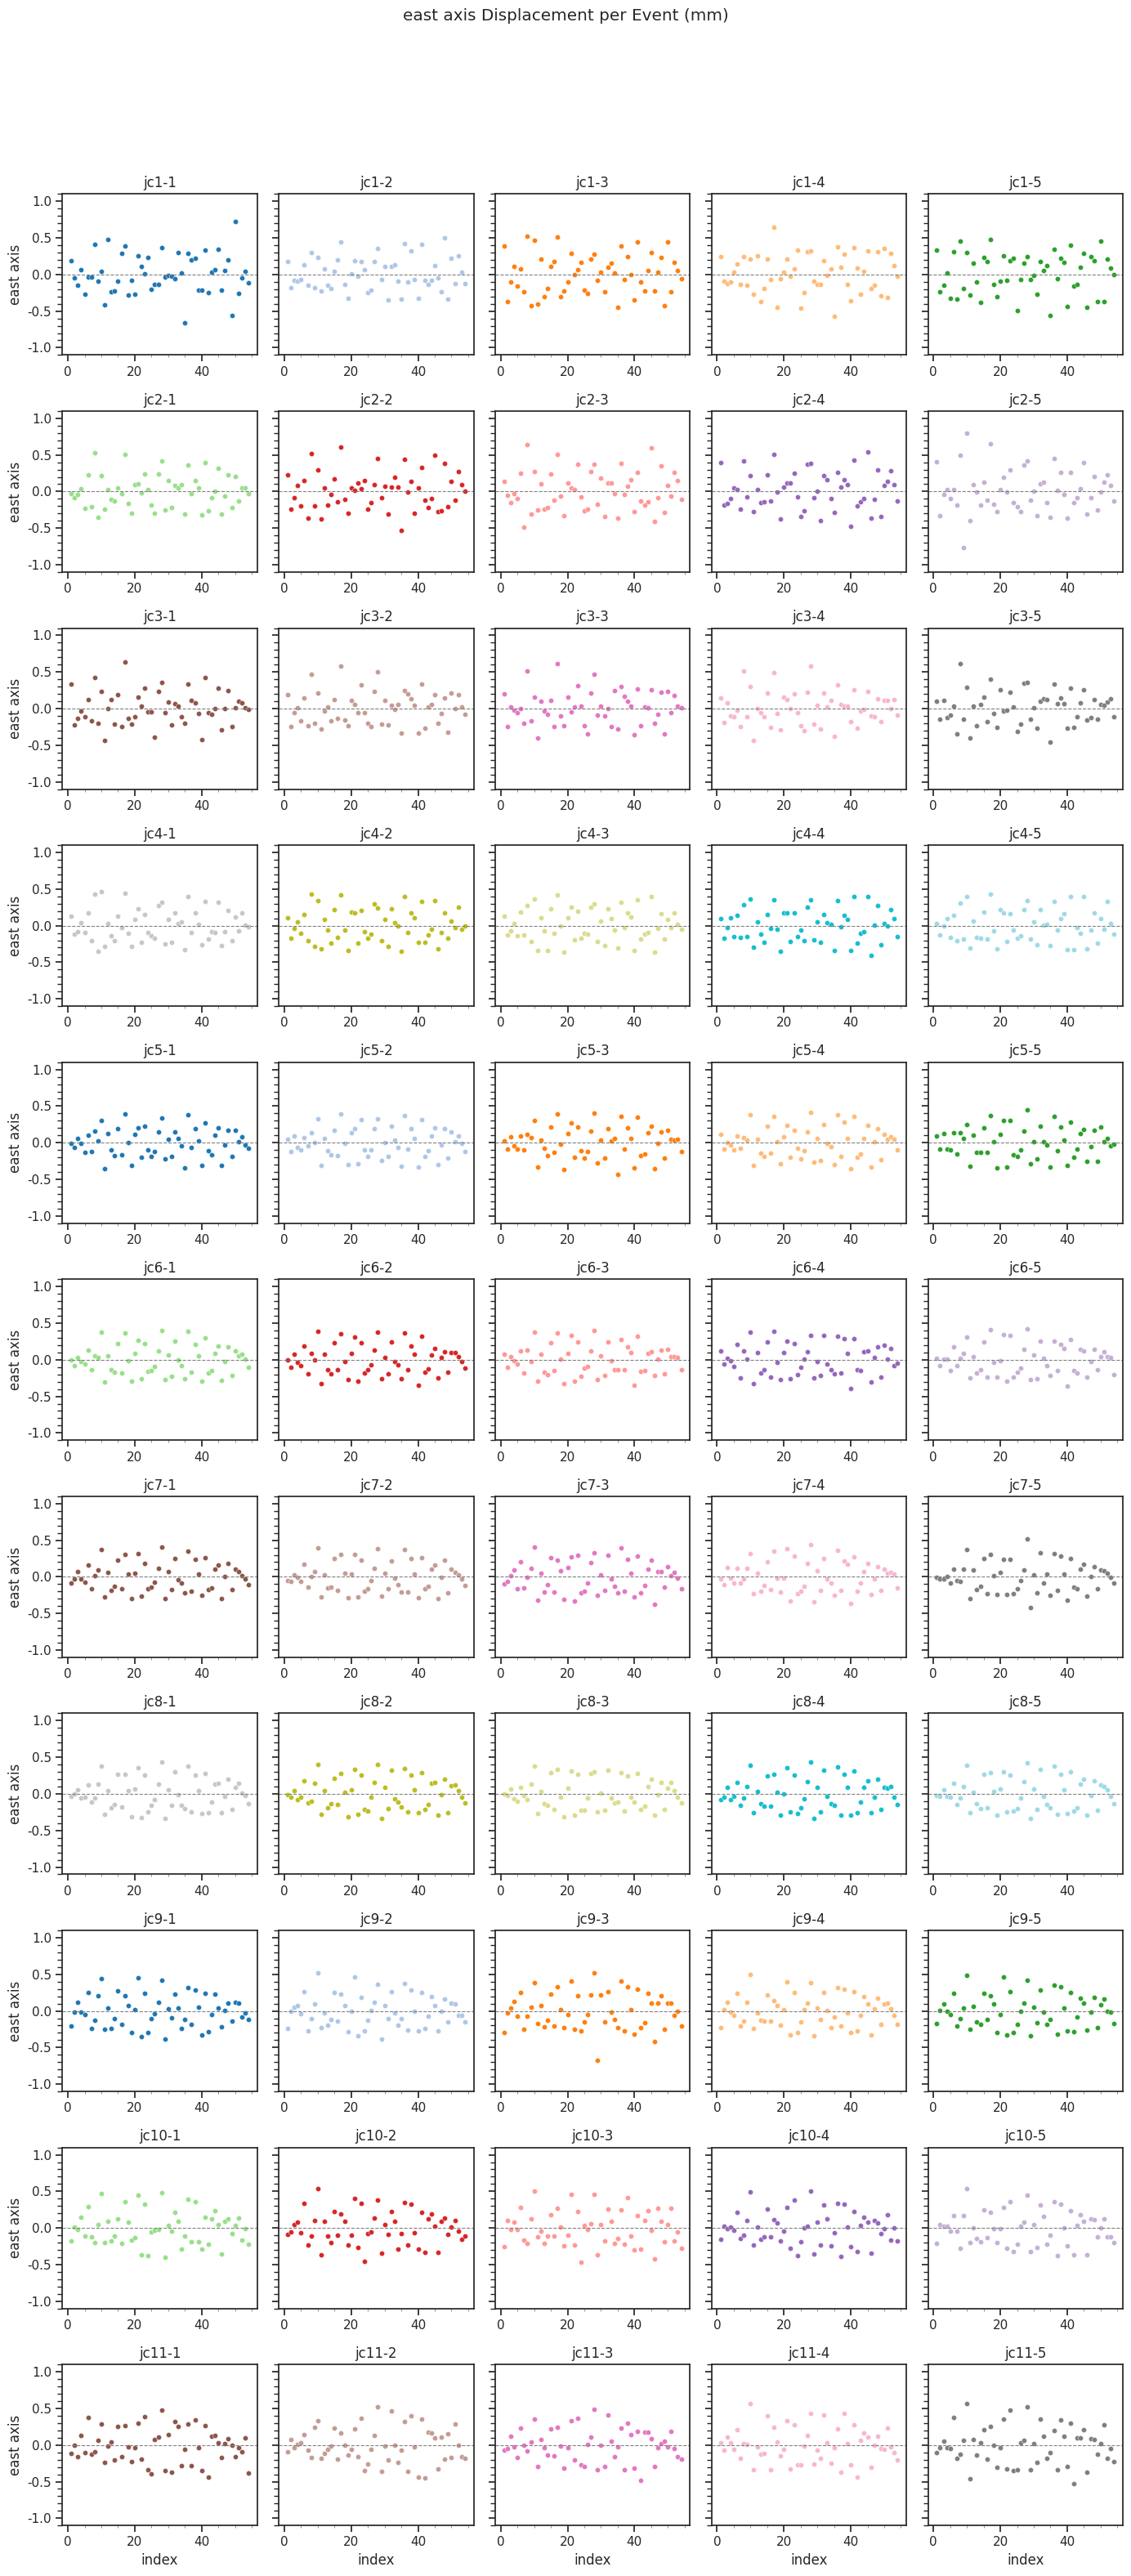

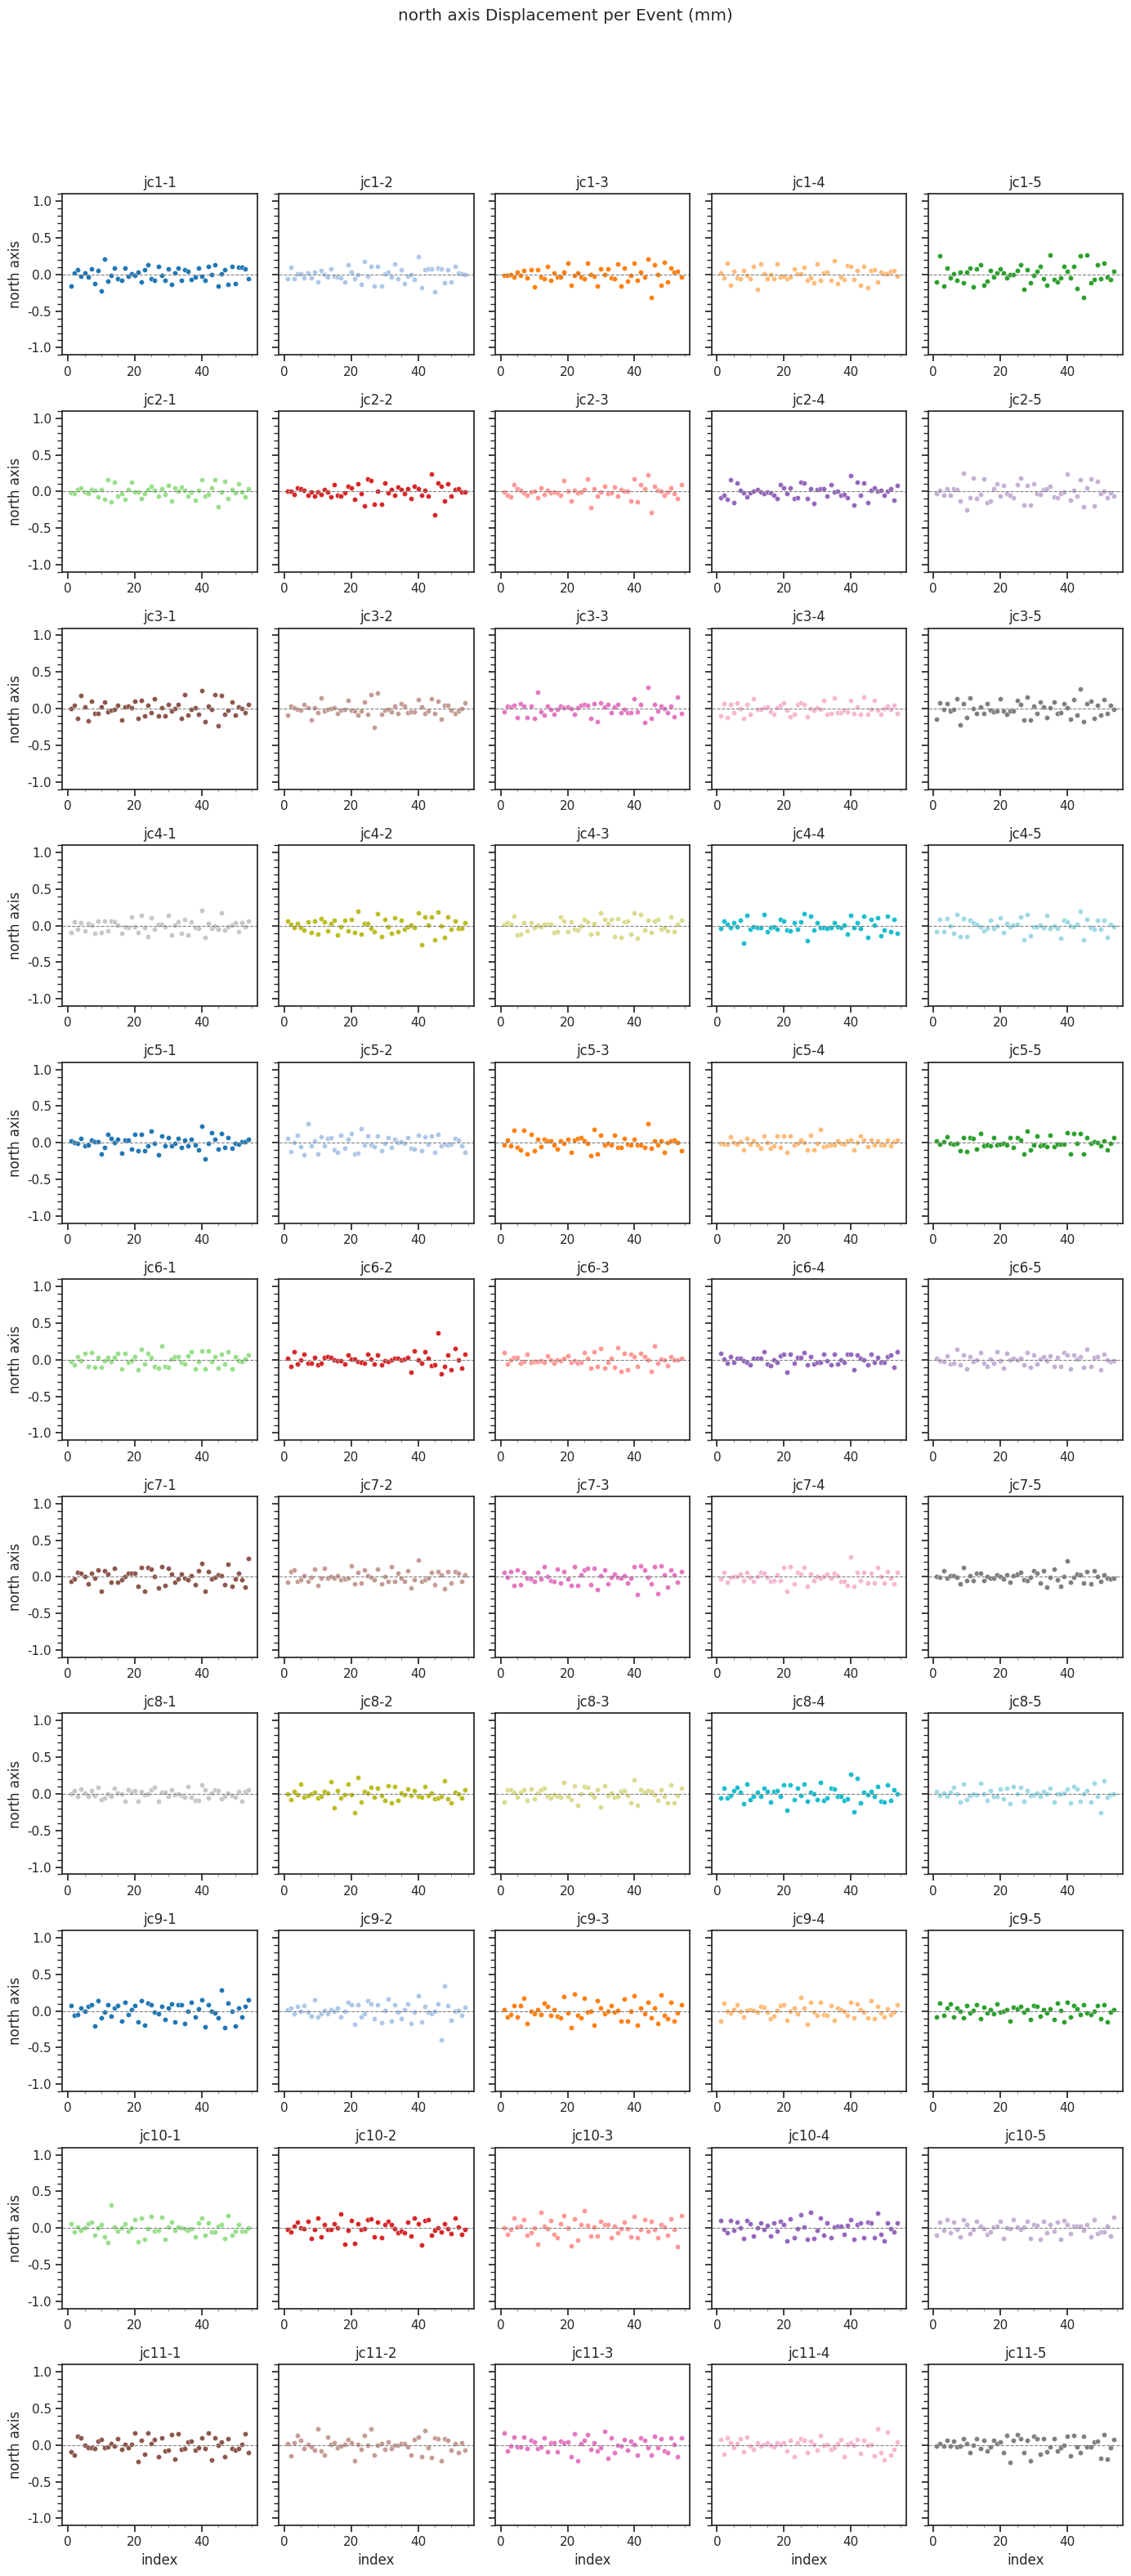

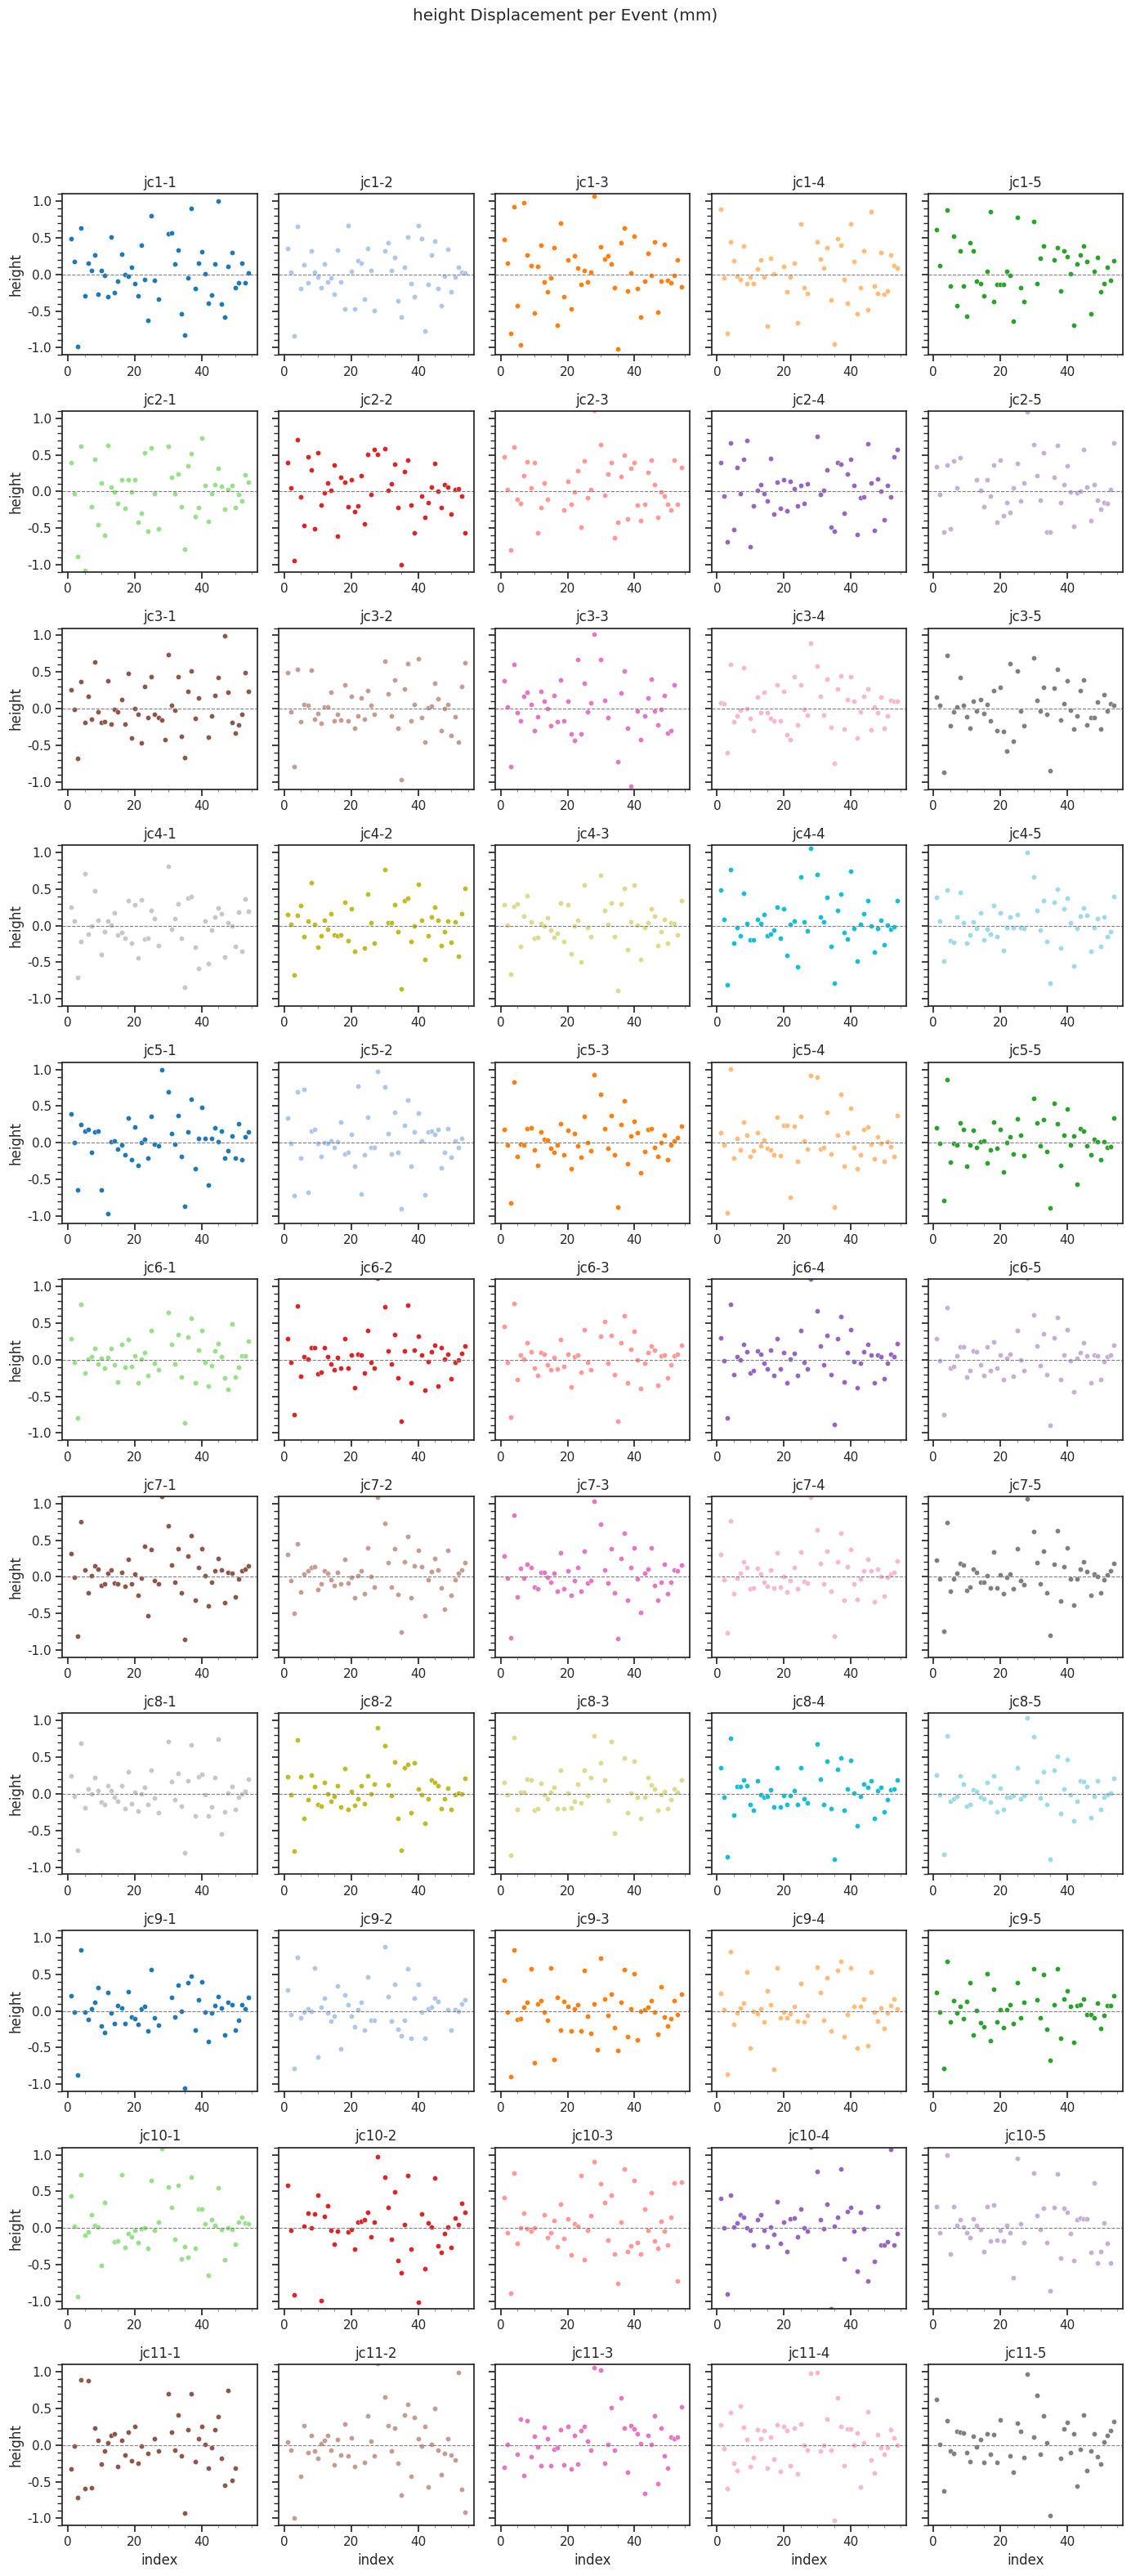

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# 中文字体 & 主题设置
rc = {'axes.unicode_minus': False}
sns.set_theme(context='notebook', style='ticks', rc=rc)

# 1. 读数据 & 过滤

table = df.rename(columns={'东单次变形量(mm)': 'east axis',
                   '北单次变形量(mm)': 'north axis',
                   '高程单次变形量(mm)': 'height',
                   '测点编号': 'point No'})

jc_list = list(table['point No'].drop_duplicates(keep='first').tolist())


# 2. 子图，共用坐标轴
palette = sns.color_palette('tab20', n_colors=len(jc_list))
for col, name in zip(['east axis', 'north axis', 'height'] ,['东单次变形量(mm)', '北单次变形量(mm)', '高程单次变形量(mm)']):
    fig, axes = plt.subplots(
                        nrows=11, ncols=5,
                        sharex='all',
                        sharey='all',
                        figsize=(14, 30)        # 宽度 14 英寸，高度 30 英寸
                    )
    axes = axes.flatten()  #
    for ax, jc in zip(axes, jc_list):
        sns.scatterplot(data=table[table['point No'] == jc],
                        x='index',
                        y=col,
                        color=palette[jc_list.index(jc)],  # 一主题一色
                        s=20,
                        edgecolor='w',
                        linewidth=.3,
                        ax=ax)
        ax.axhline(0, color='grey', lw=0.8, ls='--')
        ax.set_yticks([1, 0.5, 0, -0.5, -1])
        ax.set_ylim(-1.1, 1.1)  
        ax.set_title(jc)          # 子图标题
        ax.legend().remove()      # 去掉重复图例

        ax.xaxis.set_tick_params(which='major', labelbottom=True)
        ax.minorticks_on()
        # ax.xaxis.set_minor_locator(plt.AutoMinorLocator(5))
        ax.tick_params(axis='x', which='minor', length=2, width=0.6, color='grey')
    
    # 3. 全局标题 & 保存
    fig.suptitle(f'{col} Displacement per Event (mm)', y=1.05)
    plt.tight_layout()
    plt.savefig(f'{name}散点图', dpi=300, bbox_inches='tight')
    plt.show()

In [10]:
df

,测点编号,东坐标,东单次变形量(mm),东累计变形量(mm),北坐标,北单次变形量(mm),北累计变形量(mm),高程,高程单次变形量(mm),高程累计变形量(mm),采集时间,index
0,jc1-1,-8.250032,0.185079,-0.325441,-55.176903,-0.152351,-1.574183,0.619577,0.492099,-0.410703,07-11 00:43:09,1
1,jc1-1,-8.250076,-0.044250,-0.369691,-55.176879,0.023419,-1.550764,0.619752,0.174674,-0.236028,07-11 04:42:44,2
2,jc1-1,-8.250218,-0.141700,-0.511391,-55.176813,0.066382,-1.484382,0.618764,-0.988073,-1.224102,07-11 08:44:52,3
3,jc1-1,-8.250151,0.066518,-0.444873,-55.176837,-0.023946,-1.508328,0.619400,0.636237,-0.587864,07-11 12:44:13,4
4,jc1-1,-8.250419,-0.267911,-0.712784,-55.176820,0.016438,-1.491890,0.619105,-0.295260,-0.883125,07-11 16:44:00,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2965,jc11-5,0.508039,0.015301,0.172243,43.626033,-0.179789,0.974035,-0.060782,-0.259877,-1.057446,07-19 04:42:39,50
2966,jc11-5,0.508311,0.271531,0.443774,43.626178,0.145641,1.119676,-0.060742,0.039177,-1.018270,07-19 08:44:30,51
2967,jc11-5,0.508130,-0.181038,0.262735,43.625985,-0.193565,0.926112,-0.060610,0.132203,-0.886067,07-19 12:44:19,52
2968,jc11-5,0.508078,-0.051664,0.211071,43.625946,-0.038751,0.887361,-0.060409,0.200882,-0.685185,07-19 16:44:02,53


In [9]:
tmp = list(df['测点编号'].drop_duplicates(keep='first').tolist())


In [10]:
# 一次性取出并重命名列
dfs = {
    tag: (df.loc[df['测点编号'] == tag, ['东单次变形量(mm)', '北单次变形量(mm)', '高程单次变形量(mm)']]
         .reset_index(drop=True)  
        .rename(columns=lambda c: f'{c}_{tag}'))
    for tag in tmp
}

# 按列合并（横向拼接）
corr_df = pd.concat(dfs.values(), axis=1)

In [11]:
pd.set_option('display.max_columns', None)

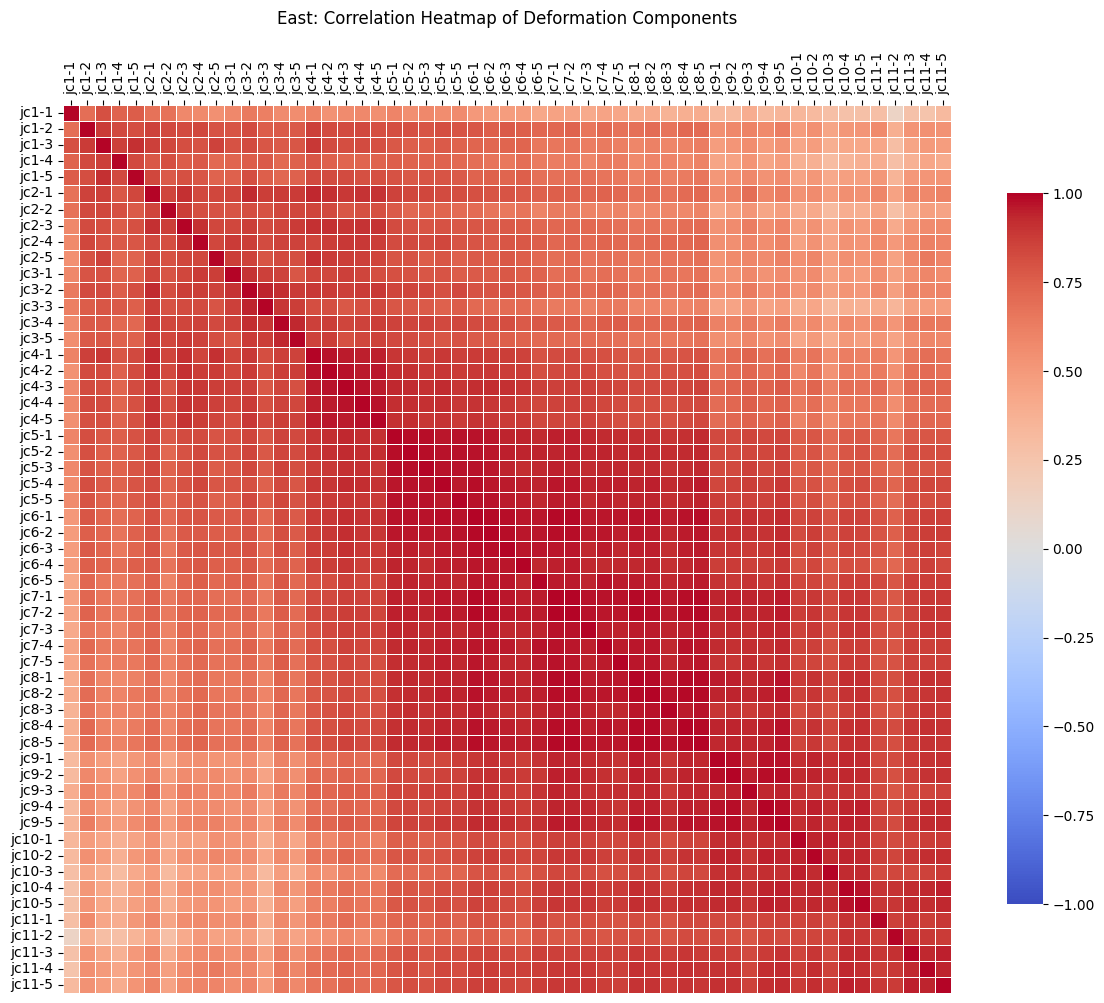

In [13]:
name = '东单次变形量(mm)_'
corr_cols = [name + i for i in tmp]
corr_mat = corr_df[corr_cols].corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(
    corr_mat,
    annot=False,
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},
    xticklabels=tmp,   # 需要显示的标签
    yticklabels=tmp,
            vmin=-1,           # ← 统一刻度
    vmax=1,
    ax=ax
)

# 关键：把 x 轴整体移到顶部
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(axis='x', top=True, bottom=False,rotation=90,
               labeltop=True, labelbottom=False)

plt.title('East: Correlation Heatmap of Deformation Components', pad=20)
plt.tight_layout()

plt.savefig(f'{name}热力图', dpi=300, bbox_inches='tight')
plt.show()


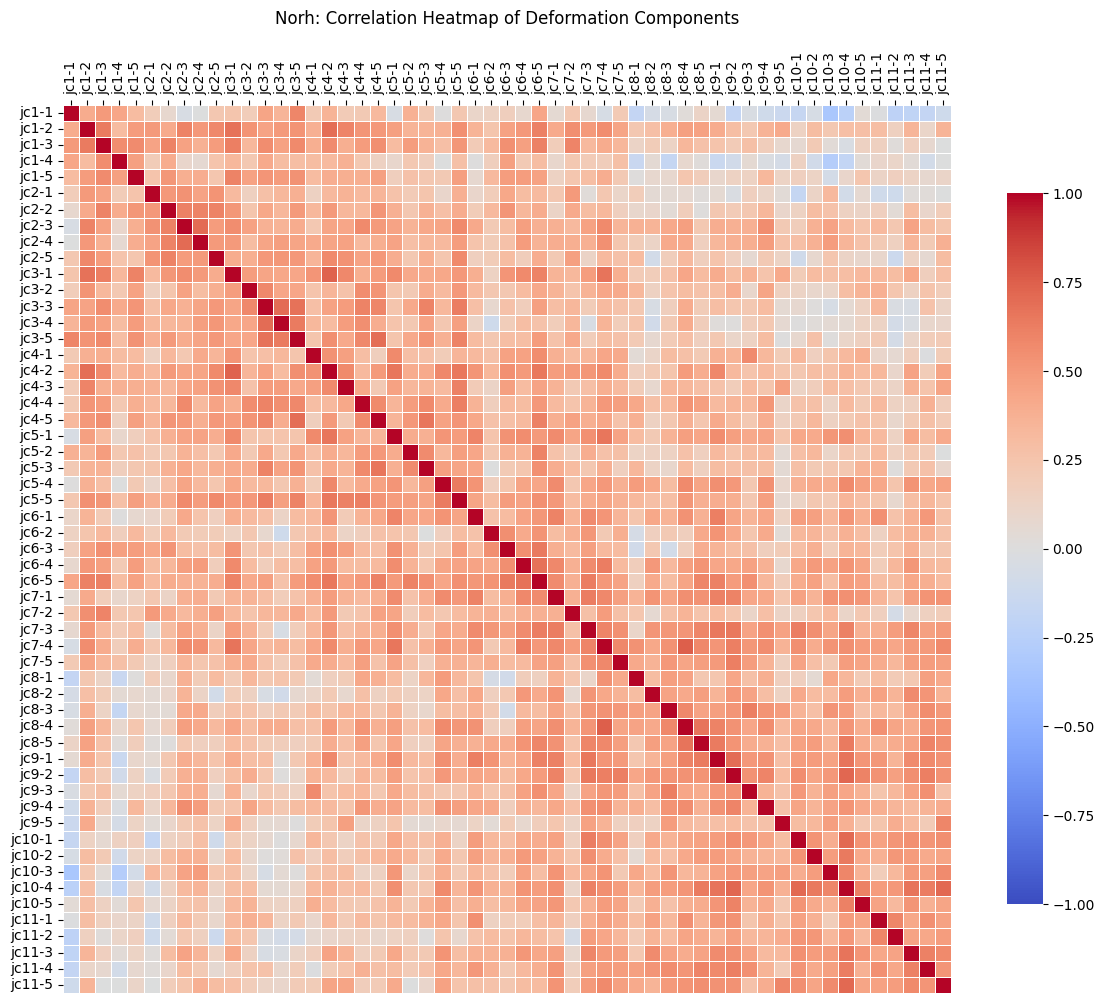

In [14]:
name = '北单次变形量(mm)_'
corr_cols = [name + i for i in tmp]
corr_mat = corr_df[corr_cols].corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(
    corr_mat,
    annot=False,
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},
    xticklabels=tmp,   # 需要显示的标签
    yticklabels=tmp,
            vmin=-1,           # ← 统一刻度
    vmax=1,
    ax=ax
)

# 关键：把 x 轴整体移到顶部
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(axis='x', top=True, bottom=False,rotation=90,
               labeltop=True, labelbottom=False)

plt.title('Norh: Correlation Heatmap of Deformation Components', pad=20)
plt.tight_layout()

plt.savefig(f'{name}热力图', dpi=300, bbox_inches='tight')
plt.show()

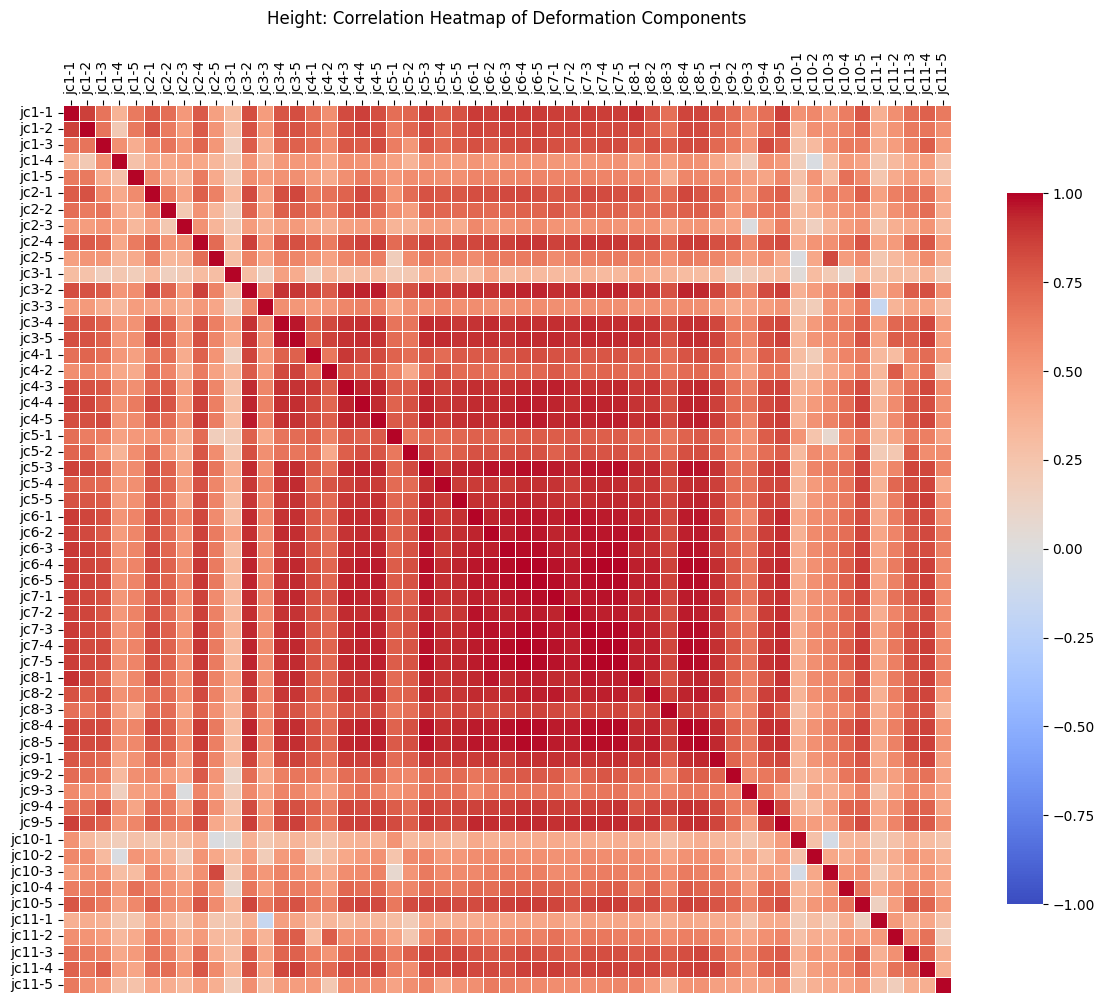

In [15]:
name = '高程单次变形量(mm)_'
corr_cols = [name + i for i in tmp]
corr_mat = corr_df[corr_cols].corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(
    corr_mat,
    annot=False,
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},
    xticklabels=tmp,   # 需要显示的标签
    yticklabels=tmp,
            vmin=-1,           # ← 统一刻度
    vmax=1,
    ax=ax
)

# 关键：把 x 轴整体移到顶部
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(axis='x', top=True, bottom=False,rotation=90,
               labeltop=True, labelbottom=False)

plt.title('Height: Correlation Heatmap of Deformation Components', pad=20)
plt.savefig(f'{name}热力图', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()